# Looking at the sum of squared errors

It is often interesting to consider what the sum of squared errors looks like as a function of the parameter values. Let's consider the data from the linear example in `SolvingNormalEquations.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

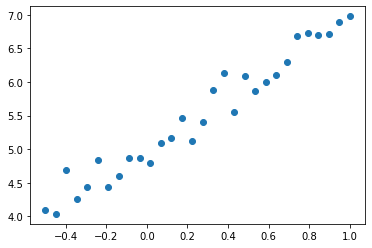

In [2]:
np.random.seed(5)
a1_true = 2
b1_true = 5
n1 = 30
x1 = np.linspace(-0.5,1,num=n1)
y1 = [a1_true*x + b1_true + 0.2*np.random.normal() for x in x1]
plt.plot(x1, y1, 'o');

Define a function that returns the sum of squared errors for the linear model

$$ f(x; a,b) = ax + b $$

so that

$$ S(a,b) = \sum_{i=1}^m (y_i - f(x_i; a,b))^2 $$

Vary (a,b) and see what the graph looks like

In [20]:
# build a grid of a and b values
n_a_vals = 100
n_b_vals = 101
a_vals_plot = np.linspace(0,4,num=n_a_vals) # choose this range to be wide enough to capture reasonable a values
b_vals_plot = np.linspace(0,10, num=n_b_vals) # same as above but for b values

# define a function that returns the sum of squared errors for different a and b values
def sum_of_squared_errors(a_in, b_in):
    s = 0.0
    for i in range(0,n1):
        s += (y1[i] - (a_in*x1[i] + b_in))**2.0
    return s

# make an array to hold all the values and compute S on all the a,b pairs
S_vals = np.empty((n_a_vals, n_b_vals))
for i in range(0, n_a_vals):
    for j in range(0, n_b_vals):
        S_vals[i,j] = sum_of_squared_errors(a_vals_plot[i], b_vals_plot[j])

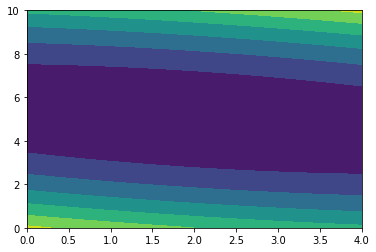

In [21]:
plt.contourf(a_vals_plot, b_vals_plot, S_vals.T);

In [22]:
print(np.amax(S_vals))
print(np.amin(S_vals))

935.859318234711
1.0674135252364148


The values of $S$ span many orders of magnitude. In order to see this on a more reasonable scale, plot the log of $S$

In [23]:
print(np.log(np.amax(S_vals)))
print(np.log(np.amin(S_vals)))

6.841465164149969
0.06523845603511888


The difference between biggest and smallest on a log scale is only about 5 or 6, whereas before it was about 1000

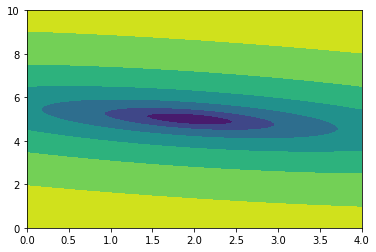

In [24]:
plt.contourf(a_vals_plot, b_vals_plot, np.log(S_vals).T);

The minimum very clearly occurs near $a=2$, $b=5$